<a href="https://colab.research.google.com/github/kdurbha/ClassResources/blob/main/50_startups_EDA_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

# Import libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Import data

In [ ]:
# Get dataset
df_start = pd.read_csv('/content/50_Startups.csv')
df_start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# prompt: Check for null values in this dataset

# Check for null values
print(df_start.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


# Analyze data

## Describe

In [ ]:
# Describe data
df_start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


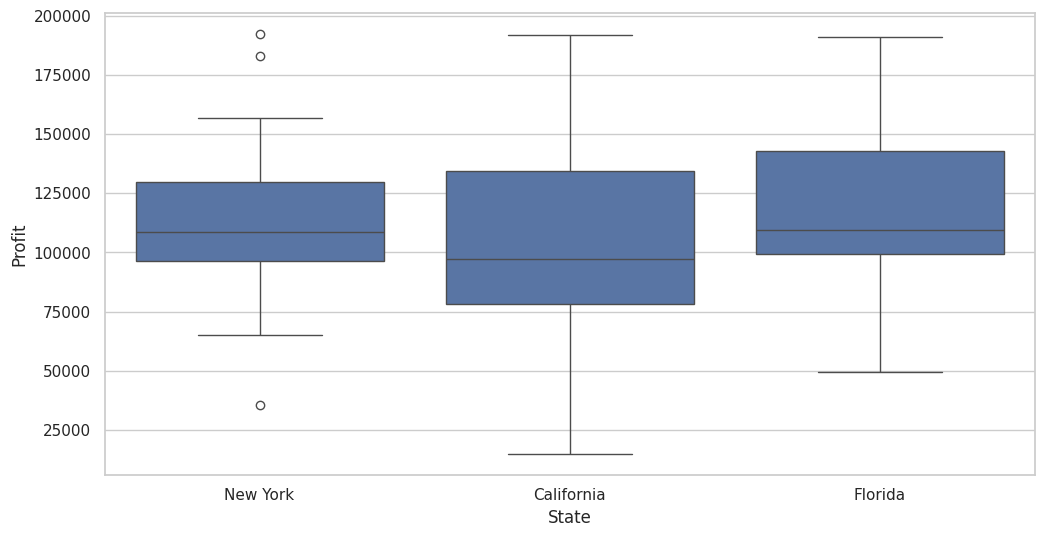

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
fig = sns.boxplot(x='State', y="Profit", data=df_start.sort_values('Profit',ascending=False))
plt.show()

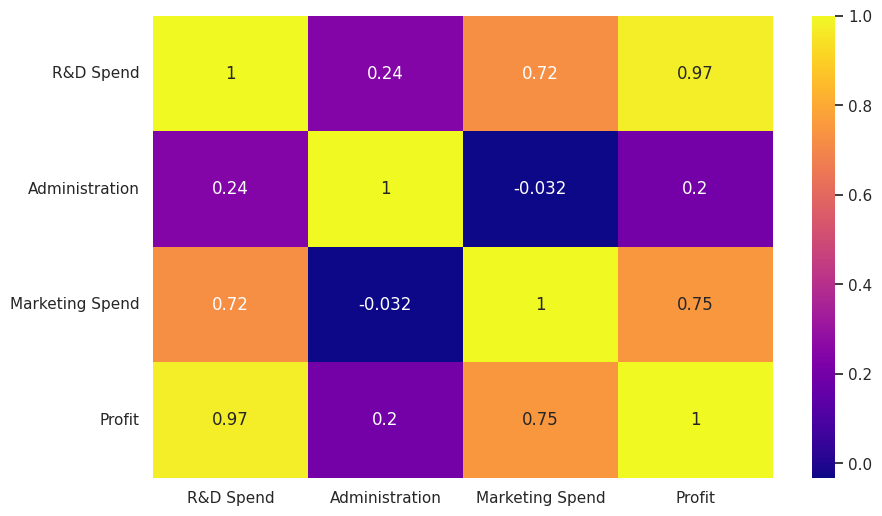

In [ ]:
# Checking for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df_start.corr(numeric_only=True), annot=True, cmap='plasma')
plt.show()

## Distribution

<ipython-input-25-09ff1edfb7fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['Profit'])


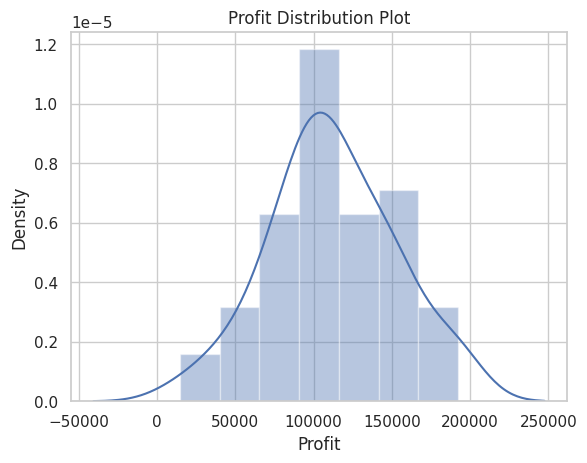

In [ ]:
# Data distribution
plt.title('Profit Distribution Plot')
sns.distplot(df_start['Profit'])
plt.show()

## Relationship between Profit and R&D Spend

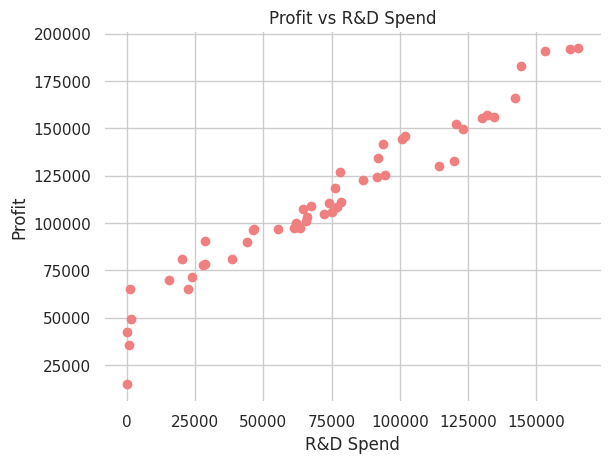

In [ ]:
# Relationship between Profit and R&D Spend
plt.scatter(df_start['R&D Spend'], df_start['Profit'], color = 'lightcoral')
plt.title('Profit vs R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.box(False)
plt.show()

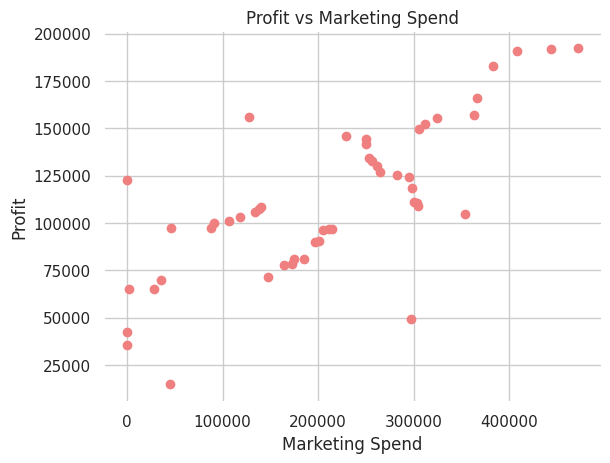

In [ ]:
# prompt: Draw xy scatter plot of Marketing Spend and profit

# Relationship between Profit and Marketing Spend
plt.scatter(df_start['Marketing Spend'], df_start['Profit'], color = 'lightcoral')
plt.title('Profit vs Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.box(False)
plt.show()

## One Hot Encoding for State Column

In [ ]:
# One hot encoding for State column and show the full dataframe
df_start = pd.get_dummies(df_start, columns=['State'])
df_start

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False
5,131876.90,99814.71,362861.36,156991.12,False,False,True
6,134615.46,147198.87,127716.82,156122.51,True,False,False
7,130298.13,145530.06,323876.68,155752.60,False,True,False
8,120542.52,148718.95,311613.29,152211.77,False,False,True
9,123334.88,108679.17,304981.62,149759.96,True,False,False


# Split into Independent/Dependent variables

In [ ]:
# Split dataset in dependent/independent variables
X = df_start.iloc[:, :-1].values
y = df_start.iloc[:, -1].values

# Split into Train/Test sets

In [ ]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Train model

In [ ]:
# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predict results

In [ ]:
# Predict result
y_pred = regressor.predict(X_test)
y_pred

array([ 1.19e-11, -6.85e-11, -7.19e-11, -3.83e-11, -6.55e-11,  1.00e+00,
        1.00e+00,  1.00e+00,  2.18e-11,  1.87e-11])

# Calculate Accuracy and Compare predictions

In [ ]:
# Calcluate accuracy of this model
from sklearn.metrics import r2_score

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 1.0


In [ ]:
# Compare predicted result with actual value
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
result

array([[ 1.19e-11,  0.00e+00],
       [-6.85e-11,  0.00e+00],
       [-7.19e-11,  0.00e+00],
       [-3.83e-11,  0.00e+00],
       [-6.55e-11,  0.00e+00],
       [ 1.00e+00,  1.00e+00],
       [ 1.00e+00,  1.00e+00],
       [ 1.00e+00,  1.00e+00],
       [ 2.18e-11,  0.00e+00],
       [ 1.87e-11,  0.00e+00]])

In [ ]:
# prompt: show the coefficients and constant of the regressor

# Print coefficients and constant
print("Coefficients:", regressor.coef_)
print("Constant (Intercept):", regressor.intercept_)

Coefficients: [ 4.81e-15  2.64e-16  1.60e-16 -5.95e-15 -1.00e+00 -1.00e+00]
Constant (Intercept): 1.0000000002421114


So the final Multiple Linear Regression Equation for the startups is:

**Profit = 4.81e-15*R&DSpend - 2.64e-16*Administration + 1.60e-16*Marketing Spend -5.95e-15*NewYork -1.00e+00*California -1.00e+00*Florida + 1.0000000002421114**